<a href="https://colab.research.google.com/github/DinaTTomoum/Thesis2021/blob/main/clintonngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load in all the modules for ngram
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk import FreqDist


In [3]:
from google.colab import files
uploaded = files.upload()  


Saving Clinton.csv to Clinton.csv


In [4]:
import pandas as pd
data = pd.read_csv('Clinton.csv', encoding= 'unicode_escape')

In [5]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.groupby([data['date'].dt.year.rename('year'), data['date'].dt.month.rename('month')]).agg({'count'})

handle Election  text  ... place_name place_country source_url
            count    count count  ...      count         count      count
year month                        ...                                    
2016 4        206      206   206  ...          0             0        206
     5        359      359   359  ...          0             0        359
     6        521      521   521  ...          0             0        521
     7        938      938   938  ...          0             0        938
     8        519      519   519  ...          0             0        519
     9        683      683   683  ...          0             0        683

[6 rows x 16 columns]

In [6]:
data.head()

,handle,Election,text,is_retweet,original_author,date,time,in_reply_to_screen_name,is_quote_status,lang,retweet_count,favorite_count,place_full_name,place_name,place_country,source_url
0,HillaryClinton,2016,The question in this election: Who can put the...,False,NaN,2016-09-28,0:22:34,NaN,False,en,218,651,NaN,NaN,NaN,https://studio.twitter.com
1,HillaryClinton,2016,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27,23:45:00,NaN,False,en,2445,5308,NaN,NaN,NaN,http://twitter.com
2,HillaryClinton,2016,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27,23:26:40,NaN,False,en,7834,27234,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck
3,HillaryClinton,2016,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27,23:08:41,NaN,False,en,916,2542,NaN,NaN,NaN,https://studio.twitter.com
4,HillaryClinton,2016,Both candidates were asked about how they'd co...,False,NaN,2016-09-27,22:30:27,NaN,False,en,859,2882,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck


count    3226.000000
mean       17.447303
std         4.811792
min         2.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        30.000000
Name: text, dtype: float64


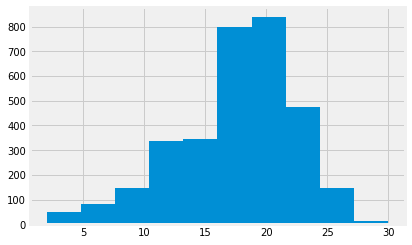

In [7]:
#We calculate the number of words in each tweet and look at the length distribution.
lens = data.text.str.split().apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet


# # cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet = re.sub(r'[^\x00-\x7F]+','', tweet)
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords

#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet


#create a function to clean the tweets
def cleanTxt(text) :
  text = remove_users(text)
  text = remove_links(text)
  text = text.lower() # lower case
  text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
  text = re.sub('([0-9]+)', '', text) # remove numbers
  text = re.sub(r'[^\x00-\x7F]+','', text)

  text = re.sub('@[^A-Za-z0-9^,!.\/+-=]', '', text) #remove mentions
  text = re.sub(r'#', '', text) #remove the hashtag symbol
  text= re.sub(r'RT[\s]+', '', text) #removing RT (retweets) text 
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
  text = re.sub('ENDOFARTICLE.','', text) # get rid of the "ENDOFARTICLE." text
  tweet_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords
  text = ' '.join(tweet_token_list)

  return text
df_cln= data.text.apply(cleanTxt)
cln = [' '.join(df_cln)]
listToStr = ' '.join(map(str, cln))   
#print(listToStr) # unhyphenate in case you want to see it



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_cln

0       question election  put plans action make life ...
1       last night  donald trump said paying taxes  sm...
2       proud   vision command last night debate showe...
3       stand together  nothing  \n\nmake sure ready v...
4       candidates asked confront racial injustice  on...
                              ...                        
3221                     great day east harlem  photos   
3222    meet three kids covered children health insura...
3223    sunday afternoon read   word  clinton   endors...
3224    muchos neoyorquinos luchan por pagar la renta ...
3225                          love  new york  go vote  \n
Name: text, Length: 3226, dtype: object

In [ ]:

import nltk
from nltk.util import ngrams
nltk.download('punkt')

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
onegram = ("1-gram: ", extract_ngrams(listToStr, 1))
twogram = ("2-gram: ", extract_ngrams(listToStr, 2))
threegram = ("3-gram: ", extract_ngrams(listToStr, 3))
fourgram = ("4-gram: ", extract_ngrams(listToStr, 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
fourgram[1][1:4]

['election put plans action',
 'put plans action make',
 'plans action make life']

In [ ]:
unigramFreq = collections.Counter(list(onegram[1]))
trigramFreq = collections.Counter(list(threegram[1]))
bigramFreq = collections.Counter(list(twogram[1]))
quadgramFreq = collections.Counter(list(fourgram[1]))
quadgramFreq.most_common(10)

[('pay fair share taxes', 9),
 ('donald trump foreign policy', 6),
 ('donald trump economic plan', 6),
 ('unites us divides us', 6),
 ('good paying jobs since', 6),
 ('paying jobs since world', 6),
 ('jobs since world war', 6),
 ('since world war ii', 6),
 ('rt youre voting hillary', 6),
 ('dont let anyone tell', 5)]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(df_cln)) 


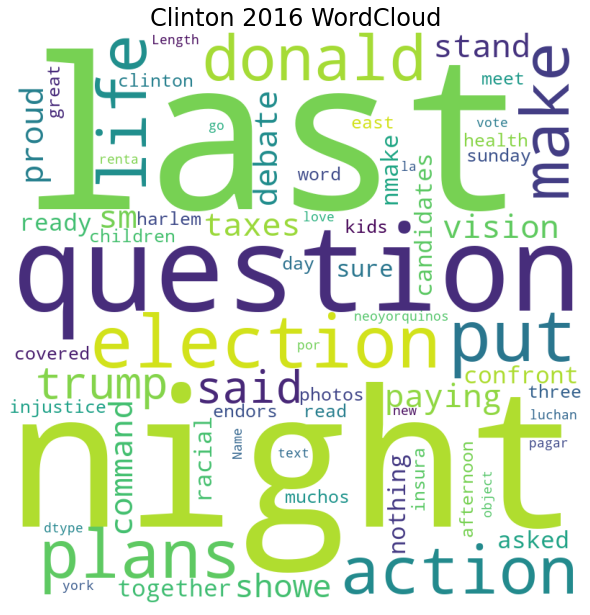

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title ("Clinton 2016 WordCloud", size=24)
plt.show() 

In [ ]:

top30bi = bigramFreq.most_common(30)
top30quad = quadgramFreq.most_common(30)
top30uni = unigramFreq.most_common(30)
top30tri = trigramFreq.most_common(30)

In [ ]:
top30uni[1][1]

746

Text(0.5, 1.0, 'Clinton 2016 Top 30 4-Grams')

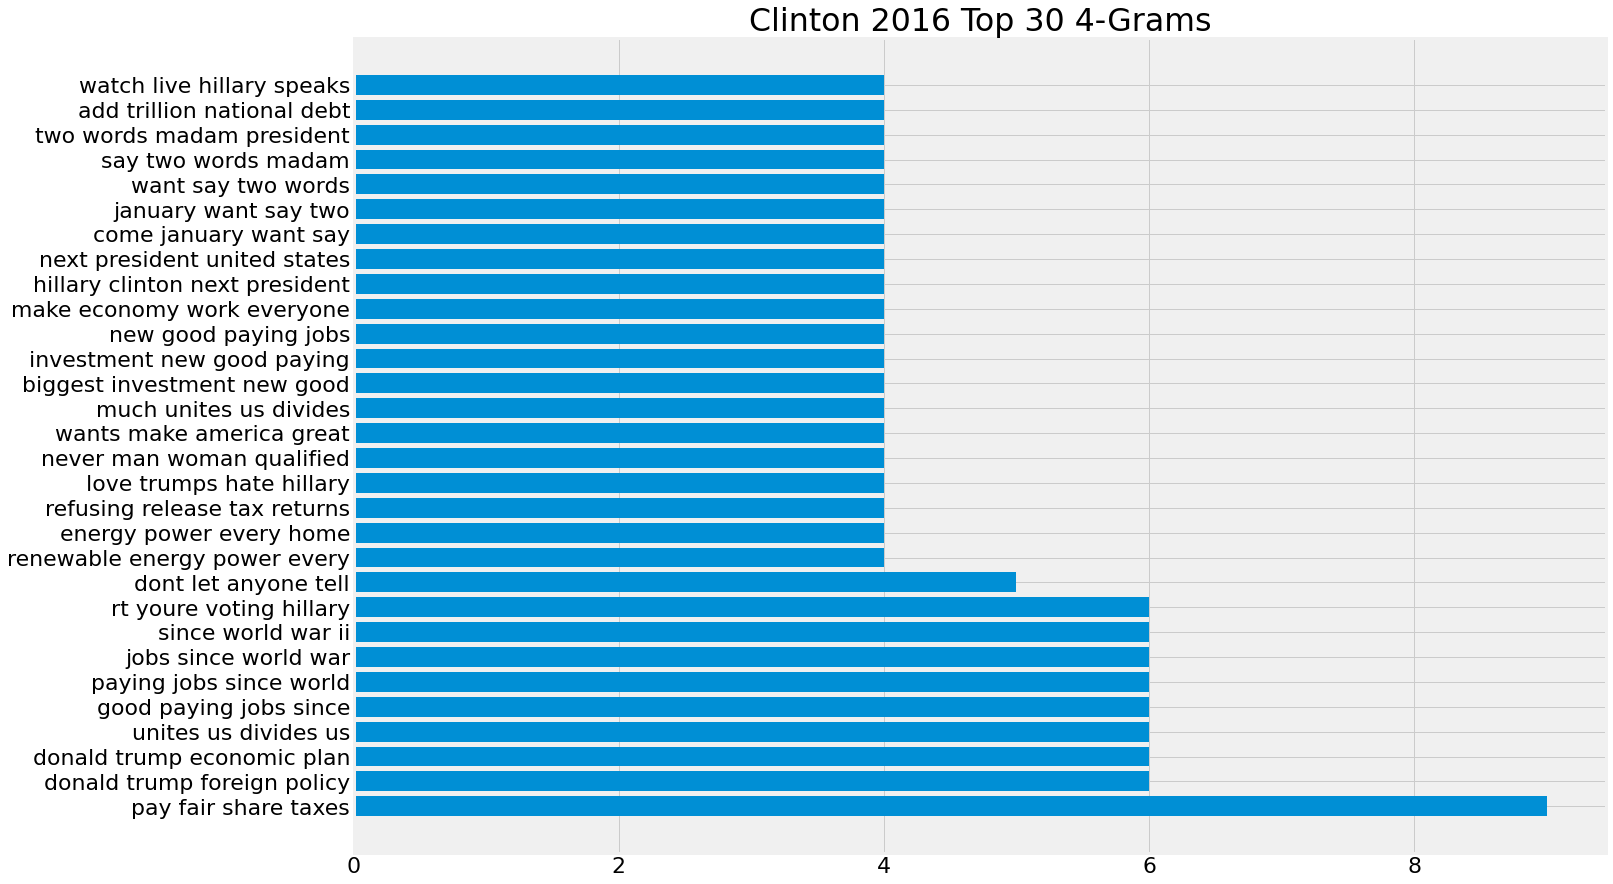

In [ ]:
import matplotlib.pyplot as plt
top30quad  = [list(elem) for elem in top30quad]
xs, ys = [*zip(*top30quad)]
plt.figure(figsize=(20,15), )
plt.rcParams.update({'font.size': 22})
plt.barh(xs,ys)
plt.title ("Clinton 2016 Top 30 4-Grams")